## Probability Based 

In [32]:
import pandas as pd
import re
import requests
import  matplotlib.pyplot  as plt

## ASCII

In [6]:
all_content = open('80k_articles.txt',encoding='UTF-8').read()

In [7]:
len(all_content)

34475997

In [8]:
all_content[:200]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球职业联赛（CBA）总决赛第四场比赛中，广东东莞银行队主场迎战新疆喀什古城队。\\n新华社记者孟永民摄\\n\u3000\u3000新华社北京４月１４日新媒体专电（记者杨烨）作为国民经济的重要支柱，央企一季度交上了一份漂亮的“'

In [23]:
def tokenize(string): 
    #return ''.join(re.findall('[\w|\d]+', string)) # 不太明白两种写法的区别，w也能匹配数字，但输出结果是有不同
    return ''.join(re.findall('\w+', string))

In [24]:
tokenize(all_content[:200])

'新华社照片东莞广东2017年4月7日n体育9篮球CBA总决赛第四场广东对阵新疆n4月7日广东东莞银行队球员易建联在比赛中扣篮n当日在20162017赛季中国男子篮球职业联赛CBA总决赛第四场比赛中广东东莞银行队主场迎战新疆喀什古城队n新华社记者孟永民摄n新华社北京４月１４日新媒体专电记者杨烨作为国民经济的重要支柱央企一季度交上了一份漂亮的'

In [25]:
ALL_CHARACTER = tokenize(all_content)
len(ALL_CHARACTER)

29733817

## Unigram

$P(W_oW_1W_2Wn) = P(W_o) \cdot P(W_1) \cdot P(W_2) \cdot P(W_n) $

In [28]:
from collections import Counter

In [29]:
all_character_counts = Counter(ALL_CHARACTER)

In [31]:
all_character_counts.most_common()[0:100]

[('的', 635684),
 ('n', 605563),
 ('国', 303683),
 ('1', 285430),
 ('在', 273451),
 ('一', 255874),
 ('中', 249541),
 ('日', 248419),
 ('2', 247140),
 ('新', 243975),
 ('0', 240159),
 ('年', 197627),
 ('月', 183696),
 ('人', 176780),
 ('大', 162508),
 ('社', 159861),
 ('华', 156763),
 ('是', 141034),
 ('和', 131350),
 ('赛', 130048),
 ('发', 129080),
 ('有', 128925),
 ('为', 126278),
 ('5', 124931),
 ('了', 124569),
 ('行', 122928),
 ('7', 121544),
 ('上', 118416),
 ('外', 117495),
 ('4', 112639),
 ('业', 112051),
 ('不', 112042),
 ('会', 109898),
 ('代', 100566),
 ('地', 96026),
 ('球', 92521),
 ('时', 92322),
 ('3', 92131),
 ('者', 91667),
 ('作', 91293),
 ('以', 91191),
 ('家', 89815),
 ('成', 89485),
 ('对', 87199),
 ('6', 86963),
 ('市', 85776),
 ('来', 85467),
 ('出', 85263),
 ('生', 84895),
 ('个', 83544),
 ('这', 81872),
 ('公', 81351),
 ('比', 80433),
 ('动', 80430),
 ('线', 80196),
 ('全', 79296),
 ('体', 79271),
 ('二', 79008),
 ('进', 78995),
 ('开', 78979),
 ('１', 78756),
 ('０', 75949),
 ('多', 75399),
 ('学', 73616),
 ('队',

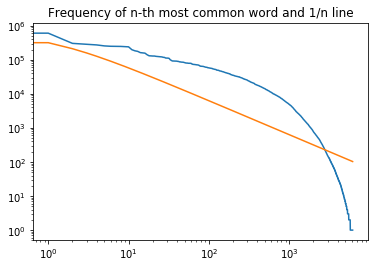

In [36]:
import  matplotlib.pyplot as plt
plt.xscale('log');plt.yscale('log');plt.title("Frequency of n-th most common word and 1/n line")
plt.plot([c for(w,c) in all_character_counts.most_common()])
M = all_character_counts.most_common()[0][1]
plt.plot([M/i for i in range(1,len(all_character_counts))])

In [59]:
def get_probability_from_counts(counts): # fast method
    total_occurences = sum(counts.values())
    def get_prob(char):
        occurence = counts.get(char,0) # D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.
        return occurence/total_occurences
    return get_prob

get_char_prob = get_probability_from_counts(all_character_counts)

def get_char_prob_slow(char): # slow method
    total_occurences = sum(all_character_counts.values())
    return all_character_counts.get(char,0)/total_occurences
    


In [60]:
import time
def get_running_time(func,arg,times):
    start = time.time()
    for _ in range(times):
        func(arg)
    print('elapsed time for {} runs of {} is {} seconds'.format(times,func.__name__,time.time()-start))

In [61]:
get_running_time(get_char_prob,'神',10000)

elapsed time for 10000 runs of get_prob is 0.0059528350830078125 seconds


In [62]:
get_running_time(get_char_prob_slow,'神',10000)

elapsed time for 10000 runs of get_char_prob_slow is 0.6741960048675537 seconds


In [64]:
from functools import reduce
from operator import mul
def prob_of_string(string):
    return reduce(mul,[get_char_prob(char) for char in string])

In [67]:
prob_of_string('这是一个比较常见测试用例')

7.8149833542281e-36

In [68]:
prob_of_string('这是一个比较罕见测试用例')

3.6957089481504437e-37

In [89]:
print(prob_of_string('广州有一个地方叫做沥窖'))
print(prob_of_string('杭州有一个地方叫做西湖'))

1.2745292803369746e-36
2.0995356460752042e-33


In [90]:
pair = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

pairs = [pair, pair2, pair3]

In [91]:
def get_probability_prefromance(language_model_func, pairs):
    for (p1, p2) in pairs:
        print('*'*18)
        print('\t\t {} with probability {}'.format(p1, language_model_func(tokenize(p1)))) # tokenize去掉','这样的标点
        print('\t\t {} with probability {}'.format(p2, language_model_func(tokenize(p2))))

In [92]:
get_probability_prefromance(prob_of_string, pairs) # 3个结果都不合理

******************
		 前天晚上吃晚饭的时候 with probability 1.2207058723774045e-31
		 前天晚上吃早饭的时候 with probability 1.420433440421635e-31
******************
		 正是一个好看的小猫 with probability 3.2528612289150613e-25
		 真是一个好看的小猫 with probability 1.0220793879946632e-25
******************
		 我无言以对，简直 with probability 3.7425390630342124e-22
		 我简直无言以对 with probability 3.742539063034212e-22


## 2-Gram

$$ Pr(w_ow_1w_2...w_n) = Pr(w_1 | w_0) \cdot Pr(w_2 | w_1) ... \cdot Pr(w_n | w_{n-1})  $$

$$ Pr(w_1 | w_0) = \frac{Pr(w_1 w_0)}{Pr(w_0)} $$

In [87]:
gram_length = 2
two_gram_counts = Counter([ALL_CHARACTER[i:i+gram_length] for i in range(len(ALL_CHARACTER)-gram_length)])

In [88]:
two_gram_counts.most_common()[0:100]

[('新华', 135490),
 ('华社', 129104),
 ('20', 123427),
 ('nn', 118789),
 ('01', 102583),
 ('17', 81801),
 ('n新', 78433),
 ('中国', 77776),
 ('外代', 74795),
 ('7年', 59051),
 ('记者', 56946),
 ('二线', 55866),
 ('5月', 55491),
 ('代二', 55245),
 ('4月', 51236),
 ('日n', 48360),
 ('月1', 47181),
 ('照片', 46712),
 ('月2', 45268),
 ('社照', 45003),
 ('日在', 39495),
 ('国际', 38923),
 ('发展', 36410),
 ('00', 32399),
 ('国家', 31742),
 ('比赛', 29313),
 ('社记', 27920),
 ('北京', 27639),
 ('美国', 27622),
 ('企业', 27381),
 ('体育', 27169),
 ('赛中', 26877),
 ('公司', 26427),
 ('10', 25595),
 ('工作', 25311),
 ('经济', 25304),
 ('16', 25070),
 ('n当', 25000),
 ('当日', 24291),
 ('２０', 24199),
 ('合作', 23932),
 ('举行', 23906),
 ('进行', 23528),
 ('年5', 23416),
 ('n5', 23383),
 ('n4', 23273),
 ('市场', 22666),
 ('足球', 22606),
 ('一个', 22231),
 ('年4', 21904),
 ('世界', 20383),
 ('n外', 20336),
 ('表示', 20215),
 ('1日', 20099),
 ('服务', 20067),
 ('6月', 19602),
 ('政府', 19325),
 ('选手', 18663),
 ('n体', 18616),
 ('建设', 18606),
 ('代2', 18516),
 ('片外', 18512),
 ('

In [123]:
get_pair_prob = get_probability_from_counts(two_gram_counts)

def get_2_gram_prob(word,prev): # probability of seeing "word" given "prev"
    if get_pair_prob(prev+word) > 0:
        return get_pair_prob(prev+word)/get_char_prob(prev)
    else:
        return get_char_prob(word)

def get_2_gram_string_prob(string):
    probList = []
    for i,c in enumerate(string):
        prev = '<s>' if i == 0 else string[i-1]
        probList.append(get_2_gram_prob(c,prev))
    return reduce(mul,probList)

In [124]:
get_probability_prefromance(prob_of_string, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 1.2207058723774045e-31
		 前天晚上吃早饭的时候 with probability 1.420433440421635e-31
******************
		 正是一个好看的小猫 with probability 3.2528612289150613e-25
		 真是一个好看的小猫 with probability 1.0220793879946632e-25
******************
		 我无言以对，简直 with probability 3.7425390630342124e-22
		 我简直无言以对 with probability 3.742539063034212e-22


In [125]:
get_probability_prefromance(get_2_gram_string_prob, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 6.847690505341362e-20
		 前天晚上吃早饭的时候 with probability 1.7483929208056836e-19
******************
		 正是一个好看的小猫 with probability 1.313877986865493e-16
		 真是一个好看的小猫 with probability 8.984863857283642e-17
******************
		 我无言以对，简直 with probability 2.143887688284483e-17
		 我简直无言以对 with probability 2.0730979185519055e-17


2.057921115909864e-15

1.6195189821101717e-12

380434793

[('的', 9938192),
 ('1', 5740539),
 ('0', 4559519),
 ('年', 4088849),
 ('2', 3705103),
 ('一', 3174566),
 ('在', 3142422),
 ('是', 2800422),
 ('中', 2763222),
 ('9', 2730241),
 ('人', 2610319),
 ('大', 2095073),
 ('有', 2064509),
 ('e', 1885083),
 ('a', 1789303),
 ('3', 1753587),
 ('5', 1721315),
 ('和', 1705550),
 ('為', 1662714),
 ('8', 1646008),
 ('以', 1611294),
 ('4', 1579101),
 ('月', 1527145),
 ('日', 1511531),
 ('6', 1501304),
 ('o', 1452120),
 ('7', 1440467),
 ('了', 1434073),
 ('国', 1417423),
 ('i', 1396361),
 ('为', 1360856),
 ('n', 1348198),
 ('r', 1329195),
 ('地', 1309342),
 ('於', 1292718),
 ('國', 1290442),
 ('成', 1267631),
 ('公', 1228434),
 ('上', 1220226),
 ('不', 1198193),
 ('出', 1152193),
 ('行', 1134022),
 ('他', 1128358),
 ('部', 1117122),
 ('斯', 1107951),
 ('t', 1088959),
 ('之', 1060971),
 ('名', 1027713),
 ('其', 994654),
 ('主', 993612),
 ('作', 977896),
 ('生', 967962),
 ('l', 964757),
 ('分', 953857),
 ('方', 948753),
 ('于', 929041),
 ('s', 920003),
 ('下', 915048),
 ('西', 912137),
 ('用', 9

NameError: name 'all_wiki_content' is not defined

In [163]:
two_gram_counts

Counter({'新华': 135490,
         '华社': 129104,
         '社照': 45003,
         '照片': 46712,
         '片东': 235,
         '东莞': 1543,
         '莞广': 195,
         '广东': 5182,
         '东2': 922,
         '20': 123427,
         '01': 102583,
         '17': 81801,
         '7年': 59051,
         '年4': 21904,
         '4月': 51236,
         '月7': 3777,
         '7日': 12919,
         '日n': 48360,
         'n体': 18616,
         '体育': 27169,
         '育9': 438,
         '9篮': 75,
         '篮球': 5154,
         '球C': 416,
         'CB': 1003,
         'BA': 5552,
         'A总': 939,
         '总决': 1968,
         '决赛': 16108,
         '赛第': 6484,
         '第四': 2788,
         '四场': 474,
         '场广': 176,
         '东对': 83,
         '对阵': 2153,
         '阵新': 88,
         '新疆': 4703,
         '疆n': 134,
         'n4': 23273,
         '日广': 727,
         '东东': 634,
         '莞银': 555,
         '银行': 9538,
         '行队': 935,
         '队球': 10498,
         '球员': 13102,
         '员易': 71,
         '易建

## Some More

1. 教学演示版本， 如果你想获得更好的结果，需要查阅更多资料，然后有很多小的点（stop words, smooth, OOV(out of vacabulary)）； 
2. 我们需要更多数据；
3. 数据也要保证高质量；

'<doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学">\n数学\n\n数学是利用符号语言研究數量、结构、变化以及空间等概念的一門学科，从某种角度看屬於形式科學的一種。數學透過抽象化和邏輯推理的使用，由計數、計算、量度和對物體形狀及運動的觀察而產生。數學家們拓展這些概念，為了公式化新的猜想以及從選定的公理及定義中建立起嚴謹推導出的定理。\n\n基礎數學的知識與運用總是個人與團體生活中不可或缺的一環。對數學基本概念的完善，早在古埃及、美索不達米亞及古印度內的古代數學文本便可觀見，而在古希臘那裡有更為嚴謹的處理。從那時開始，數學的發展便持續不斷地小幅進展，至16世紀的文藝復興時期，因为新的科學發現和數學革新兩者的交互，致使數學的加速发展，直至今日。数学并成为許多國家及地區的教育範疇中的一部分。\n\n今日，數學使用在不同的領域中，包括科學、工程、醫學和經濟學等。數學對這些領域的應用通常被稱為應用數學，有時亦會激起新的數學發現，並導致全新學科的發展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。數學家也研究純數學，就是數學本身的实质性內容，而不以任何實際應用為目標。雖然許多研究以純數學開始，但其过程中也發現許多應用之处。\n\n西方语言中“數學”（）一詞源自於古希臘語的（），其有“學習”、“學問”、“科學”，以及另外還有個較狹義且技術性的意思－「數學研究」，即使在其語源內。其形容詞（），意思為"和學習有關的"或"用功的"，亦會被用來指"數學的"。其在英语中表面上的複數形式，及在法语中的表面複數形式\'，可溯至拉丁文的中性複數\'，由西塞罗譯自希臘文複數（），此一希臘語被亚里士多德拿來指「萬物皆數」的概念。\n\n汉字表示的「數學」一詞大約产生于中国宋元時期。多指象數之學，但有時也含有今天上的數學意義，例如，秦九韶的《數學九章》（《永樂大典》記，即《數書九章》也被宋代周密所著的《癸辛雜識》記爲《數學大略》）、《數學通軌》（明代柯尚遷著）、《数学钥》（清代杜知耕著）、《數學拾遺》（清代丁取忠撰）。直到1939年，經過中國數學名詞審查委員會研究“算學”與“數學”兩詞的使用狀況後，確認以“數學”表示今天意義上的數學含義。\n\n數學有着久遠的歷史。它被認為起源於人類

## Machine Learning Quick Review

In [176]:
!ls

10k_articles.txt                       lesson01-Part01.pdf
80k_articles.txt                       lesson01-Part02.pdf
Lecture-01-An Introduction to AI.ipynb lesson01.pdf
Untitled.ipynb                         regression_example.py
Untitled1.ipynb                        sqlResult_1558435.csv


In [180]:
titanic_content = pd.read_csv(open('../../datasource/titanic_train.csv'))

In [183]:
titanic_content[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [185]:
titanic_content = pd.read_csv(open('../../datasource/titanic_train.csv'))
titanic_content = titanic_content.dropna()
age_with_fare = titanic_content[['Age', 'Fare']]
age_with_fare = age_with_fare[ (age_with_fare['Age'] > 22) & (age_with_fare['Fare'] < 400) &  (age_with_fare['Fare'] > 130)]
age = age_with_fare['Age']
fare = age_with_fare['Fare']

In [199]:
import numpy as np

In [202]:
L1 = np.array([1,2, 3])

In [210]:
L2 = np.mean(np.array([2, 3, 4]))

In [211]:
L2

3.0

In [208]:
np.abs((L2 - L1)) ** 2

def loss(y_true, yhats): return np.mean(np.abs(y_true - yhats))

array([1, 1, 1])

In [209]:
## boradcast

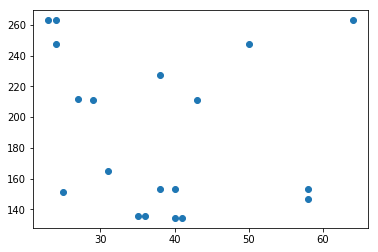

In [198]:
plt.scatter(age, fare)